In \[1\]:

    # The data is obtained from https://www.kaggle.com/datasets/rtatman/the-umass-global-english-on-twitter-dataset
    # We are trying to build a languages classifer from the dataset all_annotated.tsv

    # Relevent Paper: http://noisy-text.github.io/2017/pdf/WNUT08.pdf
    # I did not use the methods proposed in the paper

    # Use https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
    # Convert raw documents in text form into matrxi of TF-IDF features(frequency of words in a document (Number of times the term appears in the document) / (Total number of terms in the document))

In \[364\]:

    import pandas as pd
    import numpy as np
    # For EDA and plotting
    import matplotlib.pyplot as plt
    # for feature selection using PCA, it has failed to work and take way too long becasue of sparse matrix and high dimension
    # try TruncatedSVD for sparse matrix
    from sklearn.decomposition import TruncatedSVD
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import classification_report
    # tune the parameters using GridSeachCV
    from sklearn.model_selection import GridSearchCV
    # For SVM
    from sklearn.svm import SVC
    # for Logistic regression
    from sklearn.linear_model import LogisticRegression
    # For random forest
    from sklearn.ensemble import RandomForestClassifier
    # for gradient boosting classifier
    # reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    from sklearn.ensemble import GradientBoostingClassifier

In \[3\]:

    # Data is in all_annotated.tsv, same folder as the code

    data0 = pd.read_csv('all_annotated.tsv', sep='\t', header=0)

    data = data0[['Country', 'Tweet','Definitely English','Ambiguous','Definitely Not English']]

In \[4\]:

    data0.head()

Out\[4\]:

|     | Tweet ID           | Country | Date       | Tweet                                             | Definitely English | Ambiguous | Definitely Not English | Code-Switched | Ambiguous due to Named Entities | Automatically Generated Tweets |
|-----|--------------------|---------|------------|---------------------------------------------------|--------------------|-----------|------------------------|---------------|---------------------------------|--------------------------------|
| 0   | 434215992731136000 | TR      | 2014-02-14 | Bugün bulusmami lazimdiii                         | 0                  | 0         | 1                      | 0             | 0                               | 0                              |
| 1   | 285903159434563584 | TR      | 2013-01-01 | Volkan konak adami tribe sokar yemin ederim :D    | 0                  | 0         | 1                      | 0             | 0                               | 0                              |
| 2   | 285948076496142336 | NL      | 2013-01-01 | Bed                                               | 1                  | 0         | 0                      | 0             | 0                               | 0                              |
| 3   | 285965965118824448 | US      | 2013-01-01 | I felt my first flash of violence at some fool... | 1                  | 0         | 0                      | 0             | 0                               | 0                              |
| 4   | 286057979831275520 | US      | 2013-01-01 | Ladies drink and get in free till 10:30           | 1                  | 0         | 0                      | 0             | 0                               | 0                              |

In \[ \]:

    data.shape()

In \[5\]:

    data.head()

Out\[5\]:

|     | Country | Tweet                                             | Definitely English | Ambiguous | Definitely Not English |
|-----|---------|---------------------------------------------------|--------------------|-----------|------------------------|
| 0   | TR      | Bugün bulusmami lazimdiii                         | 0                  | 0         | 1                      |
| 1   | TR      | Volkan konak adami tribe sokar yemin ederim :D    | 0                  | 0         | 1                      |
| 2   | NL      | Bed                                               | 1                  | 0         | 0                      |
| 3   | US      | I felt my first flash of violence at some fool... | 1                  | 0         | 0                      |
| 4   | US      | Ladies drink and get in free till 10:30           | 1                  | 0         | 0                      |

In \[6\]:

    # nan values for country column 
    data[data['Country'].isnull()]

Out\[6\]:

|      | Country | Tweet                                              | Definitely English | Ambiguous | Definitely Not English |
|------|---------|----------------------------------------------------|--------------------|-----------|------------------------|
| 1286 | NaN     | Vou mimi                                           | 0                  | 0         | 1                      |
| 1294 | NaN     | @Andhyka1104 apasihhhhhh                           | 0                  | 0         | 1                      |
| 1296 | NaN     | Itulah enaknya jd istri hahaha \\@AyuAyuoctavia... | 0                  | 0         | 1                      |
| 1299 | NaN     | Pilates time! w/ @twitikati and our instructor...  | 1                  | 0         | 0                      |
| 1301 | NaN     | @8ofIGMshs iyah KK terima Kasih ☺ KK juga yah ...  | 0                  | 0         | 1                      |
| 1302 | NaN     | At Pesta Keboen Restoran — https://t.co/diKT7z...  | 1                  | 0         | 0                      |
| 1304 | NaN     | @SeLviiD meeting cintahhhh.. Skrg tiap sabtu u...  | 0                  | 1         | 0                      |
| 1305 | NaN     | \\@NasehatSuper: Manusia pasti akan berubah sel... | 0                  | 0         | 1                      |
| 1330 | NaN     | @Vera_Bergkamp Heb er alle vertrouwen in!!         | 0                  | 0         | 1                      |
| 3937 | NaN     | Dinner (@ Canon Roadhouse) http://t.co/gIokiCcbuv  | 0                  | 1         | 0                      |

In \[7\]:

    # Check if other columns have nan values, no nan values for other columns
    print(data[data['Tweet'].isnull()])
    print(data[data['Definitely English'].isnull()])
    print(data[data['Ambiguous'].isnull()])
    print(data[data['Definitely Not English'].isnull()])

    Empty DataFrame
    Columns: [Country, Tweet, Definitely English, Ambiguous, Definitely Not English]
    Index: []
    Empty DataFrame
    Columns: [Country, Tweet, Definitely English, Ambiguous, Definitely Not English]
    Index: []
    Empty DataFrame
    Columns: [Country, Tweet, Definitely English, Ambiguous, Definitely Not English]
    Index: []
    Empty DataFrame
    Columns: [Country, Tweet, Definitely English, Ambiguous, Definitely Not English]
    Index: []

In \[8\]:

    # remove rows with nan
    data_2 = data.dropna(subset=['Country'])

In \[9\]:

    data_2.head()

Out\[9\]:

|     | Country | Tweet                                             | Definitely English | Ambiguous | Definitely Not English |
|-----|---------|---------------------------------------------------|--------------------|-----------|------------------------|
| 0   | TR      | Bugün bulusmami lazimdiii                         | 0                  | 0         | 1                      |
| 1   | TR      | Volkan konak adami tribe sokar yemin ederim :D    | 0                  | 0         | 1                      |
| 2   | NL      | Bed                                               | 1                  | 0         | 0                      |
| 3   | US      | I felt my first flash of violence at some fool... | 1                  | 0         | 0                      |
| 4   | US      | Ladies drink and get in free till 10:30           | 1                  | 0         | 0                      |

In \[10\]:

    # get summary statistics for the dataframe data_2
    data_2.describe()

Out\[10\]:

|       | Definitely English | Ambiguous    | Definitely Not English |
|-------|--------------------|--------------|------------------------|
| count | 10492.000000       | 10492.000000 | 10492.000000           |
| mean  | 0.484560           | 0.073199     | 0.442242               |
| std   | 0.499785           | 0.260475     | 0.496676               |
| min   | 0.000000           | 0.000000     | 0.000000               |
| 25%   | 0.000000           | 0.000000     | 0.000000               |
| 50%   | 0.000000           | 0.000000     | 0.000000               |
| 75%   | 1.000000           | 0.000000     | 1.000000               |
| max   | 1.000000           | 1.000000     | 1.000000               |

In \[11\]:

    # generate the box plot for the three columns
    # boxplot does not make a lot of sense since most data is either 0 or 1
    data_2.boxplot(column=['Definitely English', 'Ambiguous', 'Definitely Not English']) 

Out\[11\]:

    <Axes: >

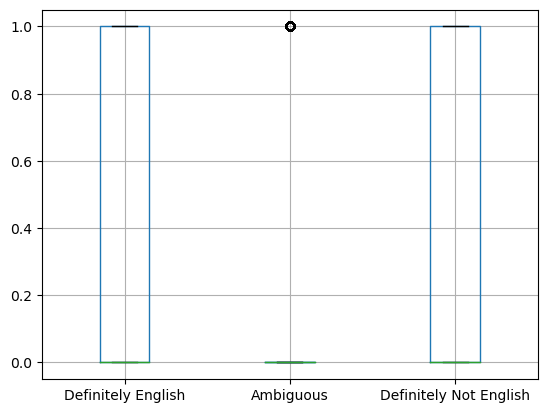

In \[470\]:

    # bar plot for EDA
    # create a grouped by df by country and get the count for each
    grouped = data_2[['Definitely English', 'Ambiguous', 'Definitely Not English']].apply(lambda x: (x == 1).astype(int)).groupby(data_2['Country']).sum()
    fig, ax = plt.subplots(figsize=(18, 6))
    grouped.plot(kind='bar', stacked=True, ax = ax)
    ax.set_ylabel("Count")
    plt.show()

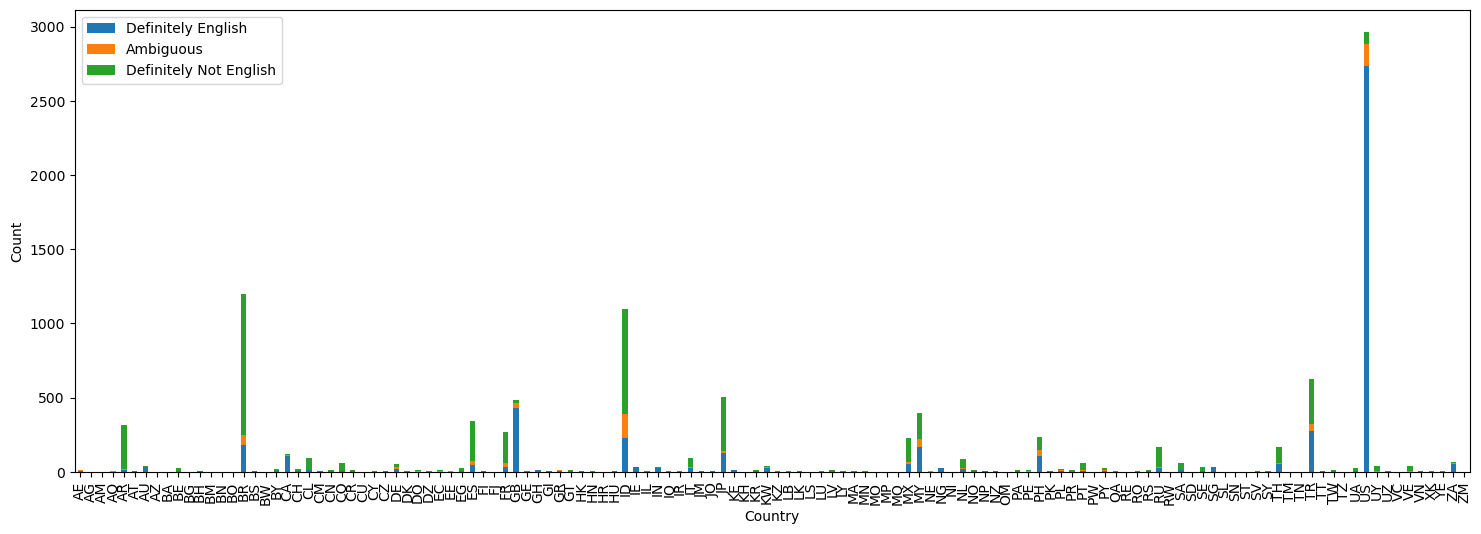

In \[471\]:

    grouped.head()

Out\[471\]:

|         | Definitely English | Ambiguous | Definitely Not English |
|---------|--------------------|-----------|------------------------|
| Country |                    |           |                        |
| AE      | 7                  | 2         | 4                      |
| AG      | 0                  | 1         | 0                      |
| AM      | 1                  | 0         | 0                      |
| AQ      | 1                  | 1         | 0                      |
| AR      | 13                 | 8         | 291                    |

In \[472\]:

    # plot the count for the total count for Definitely English  Ambiguous   Definitely Not English, the top 10 largest count by country
    grouped["Total"] = grouped["Definitely English"] + grouped["Ambiguous"] + grouped["Definitely Not English"]
    top_10_countries = grouped.sort_values(by='Total', ascending=False).head(10)
    # drop the "Total column"
    top_10_countries.drop(columns=['Total'],inplace = True)
    fig, ax = plt.subplots(figsize=(8, 6))
    top_10_countries.plot(kind='bar', stacked=True,ax = ax)
    ax.set_ylabel("Count")
    ax.set_title(" Top 10 countries with the highest tweets count")
    plt.show()

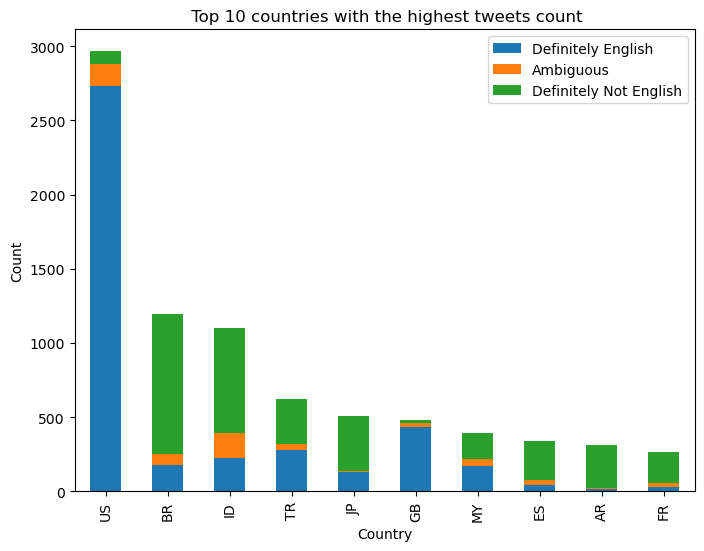

In \[473\]:

    top_10_countries

Out\[473\]:

|         | Definitely English | Ambiguous | Definitely Not English |
|---------|--------------------|-----------|------------------------|
| Country |                    |           |                        |
| US      | 2735               | 149       | 82                     |
| BR      | 180                | 70        | 945                    |
| ID      | 228                | 164       | 707                    |
| TR      | 277                | 43        | 304                    |
| JP      | 129                | 9         | 367                    |
| GB      | 431                | 32        | 18                     |
| MY      | 168                | 53        | 174                    |
| ES      | 42                 | 32        | 266                    |
| AR      | 13                 | 8         | 291                    |
| FR      | 30                 | 29        | 206                    |

In \[16\]:

    # Encode Country into numerical value using LabelEncoder
    label_encoder = LabelEncoder()
    X_country_encoded = label_encoder.fit_transform(data_2['Country'])

In \[17\]:

    # Combine the text features and encoded 'Country' as features
    X = pd.DataFrame({'Tweet': data_2['Tweet'], 'Country': X_country_encoded})
    y = data_2[['Definitely English', 'Ambiguous', 'Definitely Not English']]

In \[18\]:

    X.head()

Out\[18\]:

|     | Tweet                                             | Country |
|-----|---------------------------------------------------|---------|
| 0   | Bugün bulusmami lazimdiii                         | 113     |
| 1   | Volkan konak adami tribe sokar yemin ederim :D    | 113     |
| 2   | Bed                                               | 81      |
| 3   | I felt my first flash of violence at some fool... | 118     |
| 4   | Ladies drink and get in free till 10:30           | 118     |

In \[167\]:

    y.head()

Out\[167\]:

|     | Definitely English | Ambiguous | Definitely Not English |
|-----|--------------------|-----------|------------------------|
| 0   | 0                  | 0         | 1                      |
| 1   | 0                  | 0         | 1                      |
| 2   | 1                  | 0         | 0                      |
| 3   | 1                  | 0         | 0                      |
| 4   | 1                  | 0         | 0                      |

In \[179\]:

    y.tail()

Out\[179\]:

|       | Definitely English | Ambiguous | Definitely Not English | label |
|-------|--------------------|-----------|------------------------|-------|
| 10497 | 1                  | 0         | 0                      | 1     |
| 10498 | 0                  | 0         | 1                      | 0     |
| 10499 | 0                  | 0         | 1                      | 0     |
| 10500 | 0                  | 1         | 0                      | 2     |
| 10501 | 0                  | 1         | 0                      | 2     |

In \[191\]:

    # these are mutually exclusive classes, combine them into the same column for easy computation
    # Definitely English - 1, Ambiguous 2, Definitely not English 0
    y["label"] = 0
    y["label"][y['Definitely English'] ==1] = 1
    y["label"][y['Ambiguous'] ==1] = 2
    y["label"][y['Definitely Not English'] ==1] = 0

    /var/folders/_h/n1fdrj4s0gbbm_pj8y_f0yb80000gn/T/ipykernel_40720/1117433660.py:3: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      y["label"] = 0
    /var/folders/_h/n1fdrj4s0gbbm_pj8y_f0yb80000gn/T/ipykernel_40720/1117433660.py:4: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      y["label"][y['Definitely English'] ==1] = 1
    /var/folders/_h/n1fdrj4s0gbbm_pj8y_f0yb80000gn/T/ipykernel_40720/1117433660.py:5: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      y["label"][y['Ambiguous'] ==1] = 2
    /var/folders/_h/n1fdrj4s0gbbm_pj8y_f0yb80000gn/T/ipykernel_40720/1117433660.py:6: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      y["label"][y['Definitely Not English'] ==1] = 0

In \[206\]:

    y_full = y['label']

In \[398\]:

    y["label"].head()

Out\[398\]:

    0    0
    1    0
    2    1
    3    1
    4    1
    Name: label, dtype: int64

In \[395\]:

    y_full.describe()

Out\[395\]:

    count    10492.000000
    mean         0.630957
    std          0.615860
    min          0.000000
    25%          0.000000
    50%          1.000000
    75%          1.000000
    max          2.000000
    Name: label, dtype: float64

In \[437\]:

    # get distribution for the response variable 
    fig, ax = plt.subplots(figsize=(2,4))
    values, bins, bars = plt.hist(y_full, edgecolor='white',bins = 3)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    # show the count on the plot
    # reference: https://stackoverflow.com/questions/70416097/adding-data-labels-ontop-of-my-histogram-python-matplotlib
    plt.bar_label(bars)
    plt.title("Distribution of y")
    plt.show()

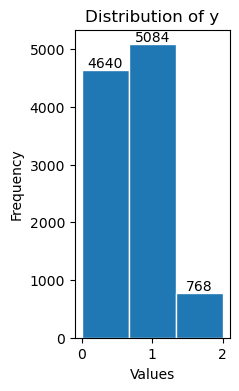

In \[409\]:

    # Random split by 80/20

    X_train, X_test, y_train, y_test = train_test_split(X, y_full, test_size=0.2, random_state=101)

In \[208\]:

    # Feature extraction using TF-IDF from scikit learn
    # set ngram to be 2 for now, capturing phrases with 1 or 2words

    tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, analyzer='char', ngram_range=(1, 2))
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Tweet'])
    X_test_tfidf = tfidf_vectorizer.transform(X_test['Tweet'])

    # Scale the 'Country' feature 
    scaler = StandardScaler()
    X_train_country_scaled = scaler.fit_transform(X_train[['Country']])
    X_test_country_scaled = scaler.fit_transform(X_test[['Country']])

    # Combined the two X_train features
    X_train_combined = np.hstack((X_train_tfidf.toarray(), X_train_country_scaled))

    # Combine the two X_test features
    X_test_combined = np.hstack((X_test_tfidf.toarray(), X_test_country_scaled))

In \[199\]:

    X_train_combined.shape  # need some feature selection, we have 8393 rows and 16329 columns

Out\[199\]:

    (8393, 16329)

In \[200\]:

    X_test_combined.shape

Out\[200\]:

    (2099, 16329)

In \[115\]:

    # select features using svd# This takes around 10 min to run!
    svd = TruncatedSVD(n_components=5000)  # Keep around 5000 components
    svd.fit(X_train_combined)

    explained_variance = svd.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o',markersize=3)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.show()

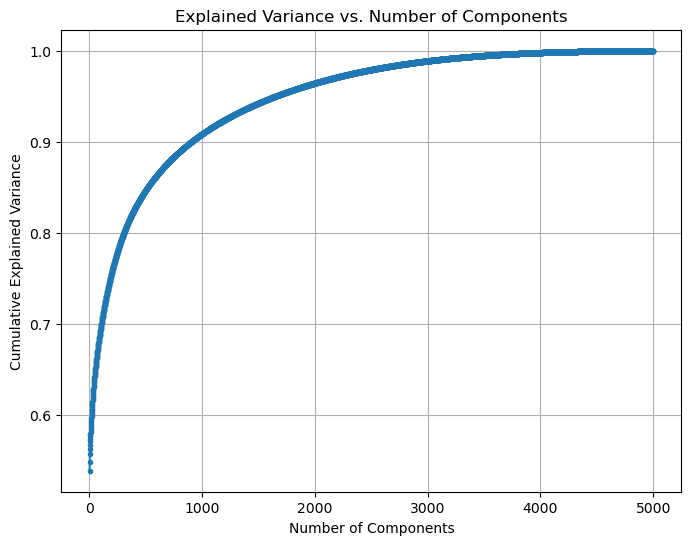

In \[117\]:

    # The minimum index where cumulative explained variance does not increase significantly, so around 3000 with 99% cumulative variance
    min(np.where(cumulative_variance >= 0.99)[0])

Out\[117\]:

    3080

In \[118\]:

    # use TruncatedSVD instead of PCA for sparse matrix, get the most important 1000 phrases
    # https://stats.stackexchange.com/questions/239481/difference-between-scikit-learn-implementations-of-pca-and-truncatedsvd
    svd = TruncatedSVD(n_components=3000)

In \[119\]:

    # Takes a while because of too many columns/features
    X_train_pca = svd.fit_transform(X_train_combined)

In \[120\]:

    X_train_pca.shape

Out\[120\]:

    (8393, 3000)

In \[121\]:

    # Apply the feature selection to the test dataset
    X_test_pca = svd.transform(X_test_combined)

In \[219\]:

    # KNN, base case use K =10
    knn_clf = KNeighborsClassifier(n_neighbors=10)
    knn_clf.fit(X_train_pca, y_train)

Out\[219\]:

    KNeighborsClassifier(n_neighbors=10)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

KNeighborsClassifier

    KNeighborsClassifier(n_neighbors=10)

In \[220\]:

    # computation speed improved by feature selection
    #knn_clf.predict(X_train_tfidf)

In \[221\]:

    # Use score to get mean accuracy for test data
    # training mean accuracy
    # testing mean accuracy use the score method

    train_accuracy = knn_clf.score(X_train_pca, y_train)
    test_accuracy = knn_clf.score(X_test_pca , y_test)

In \[222\]:

    train_accuracy

Out\[222\]:

    0.8777552722506851

In \[223\]:

    test_accuracy

Out\[223\]:

    0.8508813720819438

In \[438\]:

    # Define range of K_values to tune, the optimal K is arund sqrt(N) around 90
    k_values = list(range(2,50,2))
    # parameter grid with K values
    param_grid = {'n_neighbors': k_values}
    #grid search with 10-fold cross-validation
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy',verbose=2)
    grid_search.fit(X_train_pca, y_train) 

    Fitting 20 folds for each of 24 candidates, totalling 480 fits
    [CV] END ......................................n_neighbors=2; total time=   0.3s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.2s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.2s
    [CV] END ......................................n_neighbors=2; total time=   0.2s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.2s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=2; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.2s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.2s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.3s
    [CV] END ......................................n_neighbors=4; total time=   0.2s
    [CV] END ......................................n_neighbors=4; total time=   0.2s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.2s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.2s
    [CV] END ......................................n_neighbors=4; total time=   0.2s
    [CV] END ......................................n_neighbors=4; total time=   0.2s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=4; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.2s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=6; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.2s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.2s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.2s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.2s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.2s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END ......................................n_neighbors=8; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.2s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.2s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.2s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.2s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.2s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=10; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.2s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.2s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.2s
    [CV] END .....................................n_neighbors=12; total time=   0.2s
    [CV] END .....................................n_neighbors=12; total time=   0.2s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.2s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.2s
    [CV] END .....................................n_neighbors=12; total time=   0.2s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=12; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.2s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.2s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.2s
    [CV] END .....................................n_neighbors=14; total time=   0.2s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.2s
    [CV] END .....................................n_neighbors=14; total time=   0.2s
    [CV] END .....................................n_neighbors=14; total time=   0.2s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.2s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=14; total time=   0.2s
    [CV] END .....................................n_neighbors=14; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.2s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.2s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.1s
    [CV] END .....................................n_neighbors=16; total time=   0.2s
    [CV] END .....................................n_neighbors=16; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.1s
    [CV] END .....................................n_neighbors=18; total time=   0.1s
    [CV] END .....................................n_neighbors=18; total time=   0.1s
    [CV] END .....................................n_neighbors=18; total time=   0.1s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.1s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=18; total time=   0.1s
    [CV] END .....................................n_neighbors=18; total time=   0.1s
    [CV] END .....................................n_neighbors=18; total time=   0.2s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.2s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.2s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.2s
    [CV] END .....................................n_neighbors=20; total time=   0.1s
    [CV] END .....................................n_neighbors=20; total time=   0.2s
    [CV] END .....................................n_neighbors=20; total time=   0.2s
    [CV] END .....................................n_neighbors=20; total time=   0.2s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.2s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.2s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.2s
    [CV] END .....................................n_neighbors=22; total time=   0.2s
    [CV] END .....................................n_neighbors=22; total time=   0.2s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.2s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=22; total time=   0.2s
    [CV] END .....................................n_neighbors=22; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.2s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.2s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.2s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.2s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=24; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.2s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.2s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.2s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=26; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.2s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.1s
    [CV] END .....................................n_neighbors=28; total time=   0.2s
    [CV] END .....................................n_neighbors=28; total time=   0.2s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.2s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.2s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.2s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.2s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.1s
    [CV] END .....................................n_neighbors=30; total time=   0.2s
    [CV] END .....................................n_neighbors=30; total time=   0.2s
    [CV] END .....................................n_neighbors=30; total time=   0.2s
    [CV] END .....................................n_neighbors=32; total time=   0.2s
    [CV] END .....................................n_neighbors=32; total time=   0.2s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.2s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=32; total time=   0.2s
    [CV] END .....................................n_neighbors=32; total time=   0.1s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.1s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.1s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.1s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.1s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=34; total time=   0.2s
    [CV] END .....................................n_neighbors=36; total time=   0.2s
    [CV] END .....................................n_neighbors=36; total time=   0.2s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.2s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.2s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.2s
    [CV] END .....................................n_neighbors=36; total time=   0.1s
    [CV] END .....................................n_neighbors=36; total time=   0.2s
    [CV] END .....................................n_neighbors=36; total time=   0.2s
    [CV] END .....................................n_neighbors=38; total time=   0.2s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.2s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.2s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=38; total time=   0.2s
    [CV] END .....................................n_neighbors=38; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.1s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=40; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.1s
    [CV] END .....................................n_neighbors=42; total time=   0.1s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.1s
    [CV] END .....................................n_neighbors=42; total time=   0.1s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.1s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.1s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.2s
    [CV] END .....................................n_neighbors=42; total time=   0.1s
    [CV] END .....................................n_neighbors=44; total time=   0.1s
    [CV] END .....................................n_neighbors=44; total time=   0.1s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.1s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.1s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.1s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.1s
    [CV] END .....................................n_neighbors=44; total time=   0.2s
    [CV] END .....................................n_neighbors=44; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=46; total time=   0.1s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=46; total time=   0.2s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.2s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.2s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.2s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.2s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.1s
    [CV] END .....................................n_neighbors=48; total time=   0.2s
    [CV] END .....................................n_neighbors=48; total time=   0.2s

Out\[438\]:

    GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
                 param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                             24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
                                             44, 46, 48]},
                 scoring='accuracy', verbose=2)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
                 param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                             24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
                                             44, 46, 48]},
                 scoring='accuracy', verbose=2)

estimator: KNeighborsClassifier

    KNeighborsClassifier()

KNeighborsClassifier

    KNeighborsClassifier()

In \[439\]:

    best_K = grid_search.best_params_['n_neighbors']
    best_K

Out\[439\]:

    12

In \[226\]:

    grid_search.best_score_

Out\[226\]:

    0.8629844300488692

In \[227\]:

    accuracy_scores = grid_search.cv_results_["mean_test_score"]

In \[308\]:

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(k_values, 1-accuracy_scores, marker='o')
    plt.xlabel('K')
    plt.ylabel('Error rate')
    plt.grid(True)
    plt.show()

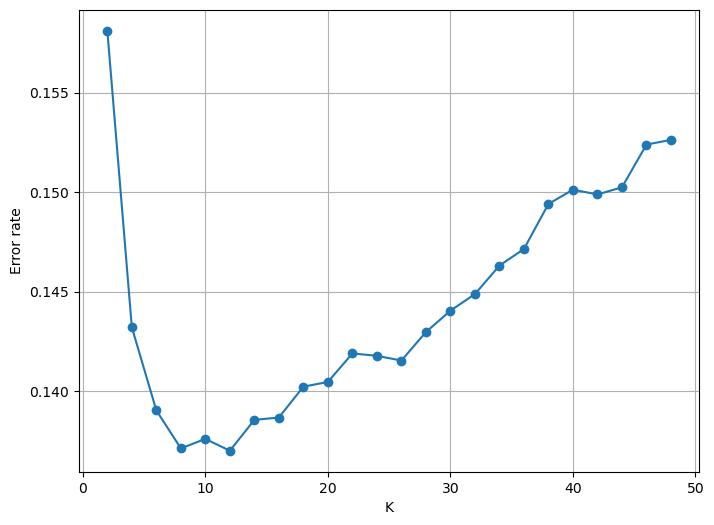

In \[466\]:

    # Accuracy rate not bad
    # Get confusion matrix for the test data
    # choose K = 12
    knn_opt = KNeighborsClassifier(n_neighbors=12)
    knn_opt.fit(X_train_pca, y_train)

    train_accuracy = knn_clf.score(X_train_pca, y_train)
    test_accuracy = knn_clf.score(X_test_pca , y_test)
    print(train_accuracy)
    print(test_accuracy)
    y_pred = knn_opt.predict(X_test_pca)
    multilabel_confusion_matrix(y_test, y_pred)

    0.8777552722506851
    0.8508813720819438

Out\[466\]:

    array([[[ 984,  181],
            [  72,  862]],

           [[ 960,  132],
            [  87,  920]],

           [[1940,    1],
            [ 155,    3]]])

In \[467\]:

    # classification report
    print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

               0       0.83      0.92      0.87       934
               1       0.87      0.91      0.89      1007
               2       0.75      0.02      0.04       158

        accuracy                           0.85      2099
       macro avg       0.82      0.62      0.60      2099
    weighted avg       0.84      0.85      0.82      2099

In \[235\]:

    # SVM, use the Gaussian Kernal "rbf"
    # base case, will tune C later on
    # SVM in sklearn accepts 1-dimension y
    svm_classifier =  svm_classifier = SVC(kernel='rbf', C=1.0)  

    svm_classifier.fit(X_train_pca, y_train)

Out\[235\]:

    SVC()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

    SVC()

In \[240\]:

    # training error better than KNN, takes some time to run
    svm_classifier.score(X_train_pca, y_train)

Out\[240\]:

    0.9310139401882521

In \[241\]:

    # test error
    svm_classifier.score(X_test_pca, y_test)

Out\[241\]:

    0.8799428299190091

In \[263\]:

    # use grid seach to tune kernel C and gamma for the Gaussian
    # reference: https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
    # becasue SVM is very slow, we will try 10 fold CV, around 1.2 min for each combination
    param_grid = {
        'kernel': [ 'rbf'],  # Try  linear and RBF(Gaussian) kernels
        'C': [0.1, 1, 10,100],       # Range of C values to search
        'gamma': [0.1,0.01,0.001,0.0001],   # Range of gamma values to search, I don't want gamma to be very large, leads to tight/head decsion boundary and overfitting
    }
    svm_classifier = SVC()
    grid = GridSearchCV(svm_classifier,param_grid,refit=True,verbose=2, cv = 10)
    grid.fit(X_train_pca,y_train)

    Fitting 10 folds for each of 16 candidates, totalling 160 fits
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 1.2min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.4min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.7min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.7min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.7min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.7min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.7min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.7min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.8min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.7min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.7min
    [CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.7min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.8min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.8min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.8min
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  56.1s
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  55.5s
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  55.5s
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  56.2s
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  55.4s
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  56.3s
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  55.3s
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  55.8s
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  55.9s
    [CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  55.7s
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.3min
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.2min
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.2min
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.3min
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.2min
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.2min
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.2min
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.2min
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.2min
    [CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 1.2min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=1, gamma=0.001, kernel=rbf; total time= 1.4min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time= 1.7min
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  44.8s
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  44.7s
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  44.7s
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  44.5s
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  45.1s
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  44.9s
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  43.8s
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  45.0s
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  46.4s
    [CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  46.9s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  53.7s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  53.9s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  52.7s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  52.0s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  52.5s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  52.1s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  51.3s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  52.2s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  52.3s
    [CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  52.4s
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.3min
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.3min
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.2min
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.3min
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.2min
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.2min
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.2min
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.3min
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.3min
    [CV] END ......................C=10, gamma=0.001, kernel=rbf; total time= 1.3min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time= 1.4min
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  44.9s
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  43.8s
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  45.6s
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  45.3s
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  44.6s
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  44.3s
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  44.1s
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  45.0s
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  44.7s
    [CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=  45.2s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  41.2s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  40.8s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  41.0s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  41.0s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  41.1s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  41.5s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  40.8s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  41.5s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  42.1s
    [CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=  41.9s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  52.5s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  52.5s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  52.9s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  52.7s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  52.2s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  52.5s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  51.5s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  52.8s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  53.7s
    [CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=  52.8s
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.3min
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.3min
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.2min
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.3min
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.2min
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.3min
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.2min
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.2min
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.2min
    [CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time= 1.2min

Out\[263\]:

    GridSearchCV(cv=10, estimator=SVC(),
                 param_grid={'C': [0.1, 1, 10, 100],
                             'gamma': [0.1, 0.01, 0.001, 0.0001],
                             'kernel': ['rbf']},
                 verbose=2)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=10, estimator=SVC(),
                 param_grid={'C': [0.1, 1, 10, 100],
                             'gamma': [0.1, 0.01, 0.001, 0.0001],
                             'kernel': ['rbf']},
                 verbose=2)

estimator: SVC

    SVC()

SVC

    SVC()

In \[264\]:

    # C = 10, gamma = 1, kernal = "rbf" is the best paramters accoding to the grid search result
    grid.best_params_

Out\[264\]:

    {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In \[289\]:

    # highest accuracy score according to the grid search
    grid.best_score_

Out\[289\]:

    0.8820469379646971

In \[303\]:

    #grid.cv_results_

    #grid_search.cv_results_
    # separate the results for gamma with different Cs
    param_C_values = np.array(grid.cv_results_['param_C'])
    mean_test_scores = grid.cv_results_['mean_test_score']
    # use mask to separate the results for different gammas
    gamma1_mask = (grid.cv_results_['param_gamma'] == 0.1)
    gamma2_mask = (grid.cv_results_['param_gamma'] == 0.01)
    gamma3_mask = (grid.cv_results_['param_gamma'] == 0.001)
    gamma4_mask = (grid.cv_results_['param_gamma'] == 0.0001)
    gamma1_Cs = param_C_values[gamma1_mask]
    gamma2_Cs = param_C_values[gamma2_mask]
    gamma3_Cs = param_C_values[gamma3_mask]
    gamma4_Cs = param_C_values[gamma4_mask]
    gamma1_scores = mean_test_scores[gamma1_mask]
    gamma2_scores = mean_test_scores[gamma2_mask]
    gamma3_scores = mean_test_scores[gamma3_mask]
    gamma4_scores = mean_test_scores[gamma4_mask]

In \[474\]:

    # plot the CV results 

    plt.figure(figsize=(10, 6))
    plt.plot(gamma1_Cs, gamma1_scores, marker='o', linestyle='-', label='gamma = 0.1')
    plt.plot(gamma2_Cs, gamma2_scores, marker='o', linestyle='-', label='gamma = 0.01')
    plt.plot(gamma3_Cs, gamma3_scores, marker='o', linestyle='-', label='gamma = 0.001')
    plt.plot(gamma4_Cs, gamma4_scores, marker='o', linestyle='-', label='gamma = 0.0001')

    plt.title('Accuracy vs. C for different gamma values')
    plt.xlabel('C (Inverse of Regularization Strength)')
    plt.ylabel('Mean Test Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

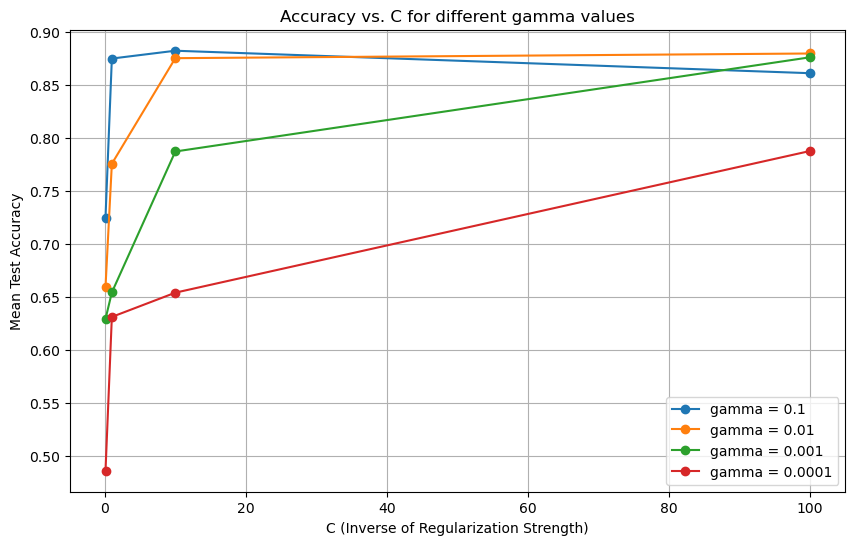

In \[268\]:

    # fit the optimal model to the training data
    svm_classifier_opt =  SVC(kernel='rbf', C=10, gamma = 0.1)  

    svm_classifier_opt.fit(X_train_pca, y_train)

Out\[268\]:

    SVC(C=10, gamma=0.1)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

    SVC(C=10, gamma=0.1)

In \[269\]:

    # training accuracy, very high
    svm_classifier_opt.score(X_train_pca, y_train)

Out\[269\]:

    0.9697366853330156

In \[270\]:

    # test accuracy, not bad
    svm_classifier_opt.score(X_test_pca, y_test)

Out\[270\]:

    0.8794664125774179

In \[274\]:

    # Confusion matrix or classfication report, poor prediction on ambiguous
    # we have very high dimension data, unable to visulize the decision boundary, actually SVM not good for high dimension data
    y_pred = svm_classifier_opt.predict(X_test_pca)
    print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

               0       0.88      0.93      0.90       934
               1       0.91      0.93      0.92      1007
               2       0.47      0.23      0.31       158

        accuracy                           0.88      2099
       macro avg       0.75      0.70      0.71      2099
    weighted avg       0.86      0.88      0.87      2099

In \[281\]:

    # Logistic Regression
    # base case
    logistic_regression_model = LogisticRegression(max_iter = 1000)
    logistic_regression_model.fit(X_train_pca, y_train)

Out\[281\]:

    LogisticRegression(max_iter=1000)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

LogisticRegression

    LogisticRegression(max_iter=1000)

In \[283\]:

    # training and test error
    # Logistic regression also very fast!
    train_accuracy = logistic_regression_model.score(X_train_pca, y_train)
    test_accuracy = logistic_regression_model.score(X_test_pca , y_test)
    print(train_accuracy)
    print(test_accuracy)

    0.9181460741093769
    0.8794664125774179

In \[294\]:

    # Use grid seach to find the optimal paramters
    # Tune the "penalty" L1 or L2
    # use sage for L1 and L2 regulization
    # Tune C: similar as SVM, the regulization term: 'C': [0.001, 0.01, 0.1, 1, 10] 
    # reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

    param_grid = {
        'penalty': ['l1', 'l2'],  # Regularization type
        'C': [0.001, 0.01, 0.1, 1],  # regularization term C, similar as SVM
        "max_iter" :[1000],
        "solver": ["saga"]
    }

    # grid search with 20 fold CV
    grid_search = GridSearchCV(logistic_regression_model, param_grid,verbose=2, cv=20, scoring='accuracy')

    # fit the grid_search
    grid_search.fit(X_train_pca, y_train)

    Fitting 20 folds for each of 8 candidates, totalling 160 fits
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.7s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   8.3s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.2s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.9s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.8s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   8.3s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.8s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.7s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   8.2s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   8.1s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.2s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.3s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.6s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.2s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.2s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.0s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   8.4s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.7s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   8.1s
    [CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   7.9s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.9s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.4s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.4s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   5.2s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.4s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.9s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.0s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   5.9s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   5.9s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   5.6s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.3s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.0s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   5.9s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.6s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   5.9s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.2s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.5s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   5.6s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   5.9s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   5.9s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.5s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.2s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.2s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.6s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.6s
    [CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   6.5s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.4s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.8s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   5.6s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.9s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   5.1s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.8s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   5.6s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   5.9s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.0s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.0s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.4s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   6.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   6.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.4s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.8s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.0s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.4s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   8.1s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.0s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.4s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.4s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   6.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   6.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.4s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   6.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   6.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.2s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.4s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.3s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.2s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.2s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   5.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.2s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.2s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.2s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   4.5s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  36.9s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  38.4s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  39.1s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  35.1s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  38.7s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  37.4s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  35.9s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  38.3s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  30.6s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  38.7s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  35.8s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  36.2s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  36.2s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  39.2s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  37.3s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  35.6s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  33.8s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  37.4s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  37.0s
    [CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=  38.0s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.6s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.6s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.4s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.3s
    [CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   5.0s

Out\[294\]:

    GridSearchCV(cv=20, estimator=LogisticRegression(max_iter=1000),
                 param_grid={'C': [0.001, 0.01, 0.1, 1], 'max_iter': [1000],
                             'penalty': ['l1', 'l2'], 'solver': ['saga']},
                 scoring='accuracy', verbose=2)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=20, estimator=LogisticRegression(max_iter=1000),
                 param_grid={'C': [0.001, 0.01, 0.1, 1], 'max_iter': [1000],
                             'penalty': ['l1', 'l2'], 'solver': ['saga']},
                 scoring='accuracy', verbose=2)

estimator: LogisticRegression

    LogisticRegression(max_iter=1000)

LogisticRegression

    LogisticRegression(max_iter=1000)

In \[295\]:

    # the best paramter according to grid search
    print(grid_search.best_params_)
    print(grid_search.best_score_)

    {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
    0.8813336742811684

In \[300\]:

    #grid_search.cv_results_
    # separate the results for L1 and L2 regulization
    param_C_values = np.array(grid_search.cv_results_['param_C'])
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    # use mask to separate the results for L1 and L2 regulization
    l1_mask = (grid_search.cv_results_['param_penalty'] == 'l1')
    l2_mask = (grid_search.cv_results_['param_penalty'] == 'l2')
    l1_Cs = param_C_values[l1_mask]
    l1_scores = mean_test_scores[l1_mask]
    l2_Cs = param_C_values[l2_mask]
    l2_scores = mean_test_scores[l2_mask]

In \[304\]:

    # plot the CV results 

    plt.figure(figsize=(10, 6))
    plt.plot(l1_Cs, l1_scores, marker='o', linestyle='-', label='L1 Regularization')
    plt.plot(l2_Cs, l2_scores, marker='o', linestyle='-', label='L2 Regularization')
    plt.title('Accuracy vs. C for L1 and L2 Regularization')
    plt.xlabel('C (inverse of Regularization Strength)')
    plt.ylabel('Mean Test Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

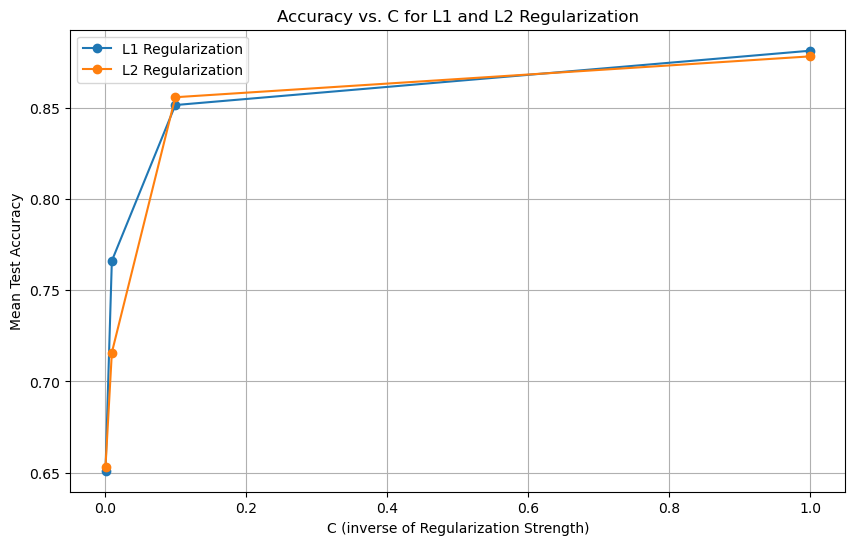

In \[307\]:

    # use the optimal model to make predictions
    logistic_regression_opt = LogisticRegression(C = 1, max_iter= 1000, penalty = 'l1', solver= 'saga')
    logistic_regression_opt.fit(X_train_pca, y_train)

Out\[307\]:

    LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

LogisticRegression

    LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')

In \[310\]:

    # training error and testing error
    train_accuracy = logistic_regression_opt.score(X_train_pca, y_train)
    test_accuracy = logistic_regression_opt.score(X_test_pca , y_test)
    print(train_accuracy)
    print(test_accuracy)

    0.8950315739306565
    0.8804192472606003

In \[311\]:

    # confusion matrix and classification report # large error for ambiguous group

    y_pred = logistic_regression_opt.predict(X_test_pca)
    print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

               0       0.88      0.93      0.91       934
               1       0.90      0.94      0.92      1007
               2       0.56      0.18      0.28       158

        accuracy                           0.88      2099
       macro avg       0.78      0.69      0.70      2099
    weighted avg       0.86      0.88      0.86      2099

In \[330\]:

    # random forest
    # fit a base case senario, set min_samples_leaf to be 20 to avoid overfitting
    random_forest_model = RandomForestClassifier(n_estimators=100, min_samples_leaf = 20)

    # Fit the model
    random_forest_model.fit(X_train_pca, y_train)

Out\[330\]:

    RandomForestClassifier(min_samples_leaf=20)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestClassifier

    RandomForestClassifier(min_samples_leaf=20)

In \[331\]:

    train_accuracy = random_forest_model.score(X_train_pca, y_train)
    test_accuracy = random_forest_model.score(X_test_pca , y_test)
    print(train_accuracy)
    print(test_accuracy)

    0.9169546050279995
    0.8361124344926155

In \[380\]:

    # Use grid seach to tune n_estimators(n_trees), max_features(# of features to consider for the best split)
    random_forest_model = RandomForestClassifier(min_samples_leaf = 20)
    param_grid = {
        'n_estimators': [50,100,150],
        'max_features': [70,120,200]
    }

    # run 10 fold CV

    grid_search = GridSearchCV(random_forest_model, param_grid, verbose=2,cv=10, scoring='accuracy')
    grid_search.fit(X_train_pca,y_train)

    Fitting 10 folds for each of 9 candidates, totalling 90 fits
    [CV] END ...................max_features=70, n_estimators=50; total time=  16.0s
    [CV] END ...................max_features=70, n_estimators=50; total time=  15.1s
    [CV] END ...................max_features=70, n_estimators=50; total time=  15.2s
    [CV] END ...................max_features=70, n_estimators=50; total time=  15.4s
    [CV] END ...................max_features=70, n_estimators=50; total time=  15.5s
    [CV] END ...................max_features=70, n_estimators=50; total time=  15.9s
    [CV] END ...................max_features=70, n_estimators=50; total time=  15.5s
    [CV] END ...................max_features=70, n_estimators=50; total time=  15.7s
    [CV] END ...................max_features=70, n_estimators=50; total time=  15.9s
    [CV] END ...................max_features=70, n_estimators=50; total time=  15.8s
    [CV] END ..................max_features=70, n_estimators=100; total time=  32.0s
    [CV] END ..................max_features=70, n_estimators=100; total time=  31.3s
    [CV] END ..................max_features=70, n_estimators=100; total time=  31.2s
    [CV] END ..................max_features=70, n_estimators=100; total time=  30.9s
    [CV] END ..................max_features=70, n_estimators=100; total time=  30.4s
    [CV] END ..................max_features=70, n_estimators=100; total time=  30.7s
    [CV] END ..................max_features=70, n_estimators=100; total time=  31.2s
    [CV] END ..................max_features=70, n_estimators=100; total time=  32.0s
    [CV] END ..................max_features=70, n_estimators=100; total time=  32.0s
    [CV] END ..................max_features=70, n_estimators=100; total time=  31.1s
    [CV] END ..................max_features=70, n_estimators=150; total time=  46.4s
    [CV] END ..................max_features=70, n_estimators=150; total time=  47.6s
    [CV] END ..................max_features=70, n_estimators=150; total time=  47.1s
    [CV] END ..................max_features=70, n_estimators=150; total time=  48.3s
    [CV] END ..................max_features=70, n_estimators=150; total time=  46.3s
    [CV] END ..................max_features=70, n_estimators=150; total time=  47.0s
    [CV] END ..................max_features=70, n_estimators=150; total time=  47.2s
    [CV] END ..................max_features=70, n_estimators=150; total time=  47.8s
    [CV] END ..................max_features=70, n_estimators=150; total time=  45.3s
    [CV] END ..................max_features=70, n_estimators=150; total time=  47.4s
    [CV] END ..................max_features=120, n_estimators=50; total time=  24.6s
    [CV] END ..................max_features=120, n_estimators=50; total time=  24.6s
    [CV] END ..................max_features=120, n_estimators=50; total time=  24.3s
    [CV] END ..................max_features=120, n_estimators=50; total time=  24.8s
    [CV] END ..................max_features=120, n_estimators=50; total time=  25.6s
    [CV] END ..................max_features=120, n_estimators=50; total time=  24.2s
    [CV] END ..................max_features=120, n_estimators=50; total time=  24.9s
    [CV] END ..................max_features=120, n_estimators=50; total time=  24.7s
    [CV] END ..................max_features=120, n_estimators=50; total time=  24.1s
    [CV] END ..................max_features=120, n_estimators=50; total time=  25.1s
    [CV] END .................max_features=120, n_estimators=100; total time=  49.5s
    [CV] END .................max_features=120, n_estimators=100; total time=  49.8s
    [CV] END .................max_features=120, n_estimators=100; total time=  49.7s
    [CV] END .................max_features=120, n_estimators=100; total time=  50.1s
    [CV] END .................max_features=120, n_estimators=100; total time=  49.6s
    [CV] END .................max_features=120, n_estimators=100; total time=  49.0s
    [CV] END .................max_features=120, n_estimators=100; total time=  49.4s
    [CV] END .................max_features=120, n_estimators=100; total time=  51.4s
    [CV] END .................max_features=120, n_estimators=100; total time=  51.4s
    [CV] END .................max_features=120, n_estimators=100; total time=  49.5s
    [CV] END .................max_features=120, n_estimators=150; total time= 1.2min
    [CV] END .................max_features=120, n_estimators=150; total time= 1.2min
    [CV] END .................max_features=120, n_estimators=150; total time= 1.3min
    [CV] END .................max_features=120, n_estimators=150; total time= 1.2min
    [CV] END .................max_features=120, n_estimators=150; total time= 1.2min
    [CV] END .................max_features=120, n_estimators=150; total time= 1.3min
    [CV] END .................max_features=120, n_estimators=150; total time= 1.3min
    [CV] END .................max_features=120, n_estimators=150; total time= 1.3min
    [CV] END .................max_features=120, n_estimators=150; total time= 1.2min
    [CV] END .................max_features=120, n_estimators=150; total time= 1.2min
    [CV] END ..................max_features=200, n_estimators=50; total time=  37.6s
    [CV] END ..................max_features=200, n_estimators=50; total time=  39.2s
    [CV] END ..................max_features=200, n_estimators=50; total time=  38.7s
    [CV] END ..................max_features=200, n_estimators=50; total time=  37.5s
    [CV] END ..................max_features=200, n_estimators=50; total time=  36.0s
    [CV] END ..................max_features=200, n_estimators=50; total time=  38.9s
    [CV] END ..................max_features=200, n_estimators=50; total time=  39.0s
    [CV] END ..................max_features=200, n_estimators=50; total time=  40.4s
    [CV] END ..................max_features=200, n_estimators=50; total time=  40.6s
    [CV] END ..................max_features=200, n_estimators=50; total time=  37.7s
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=100; total time= 1.3min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.9min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.9min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.9min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.9min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.9min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.9min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.9min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.9min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.9min
    [CV] END .................max_features=200, n_estimators=150; total time= 1.8min

Out\[380\]:

    GridSearchCV(cv=10, estimator=RandomForestClassifier(min_samples_leaf=20),
                 param_grid={'max_features': [70, 120, 200],
                             'n_estimators': [50, 100, 150]},
                 scoring='accuracy', verbose=2)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=10, estimator=RandomForestClassifier(min_samples_leaf=20),
                 param_grid={'max_features': [70, 120, 200],
                             'n_estimators': [50, 100, 150]},
                 scoring='accuracy', verbose=2)

estimator: RandomForestClassifier

    RandomForestClassifier(min_samples_leaf=20)

RandomForestClassifier

    RandomForestClassifier(min_samples_leaf=20)

In \[381\]:

    print(grid_search.best_params_)
    print(grid_search.best_score_)

    {'max_features': 200, 'n_estimators': 150}
    0.8590504568931268

In \[382\]:

    #plot grid_search.cv_results_
    # 4 lines (each line represents a differnet n_estimator with 4 max_features)
    n_estimators_values = np.array([50,100,150])
    max_features_values = np.array([70,120,200])
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    # convert the mean_test_scores into 2D array
    mean_test_scores_2d = np.array(mean_test_scores).reshape(len(n_estimators_values), len(max_features_values))

    # Plotting
    plt.figure(figsize=(10, 6))
    for i, n_estimators in enumerate(n_estimators_values):
        plt.plot(max_features_values, mean_test_scores_2d[i, :], marker='o', label=f'n_estimators={n_estimators}')
    plt.title('Accuracy vs. max_features for Random Forest CV results')
    plt.xlabel('max_features')
    plt.ylabel('Mean Test Accuracy')
    plt.legend(title='Number of Trees (n_estimators)')
    plt.grid(True)
    plt.show()

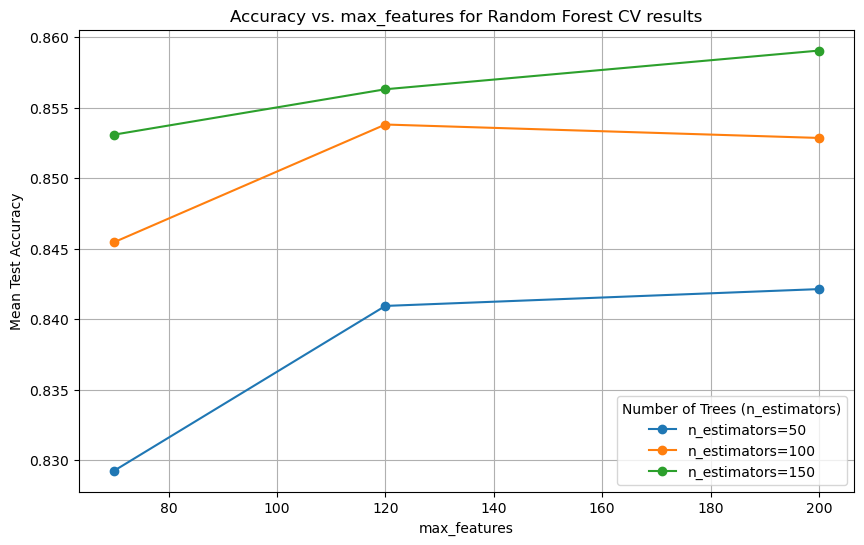

In \[383\]:

    # fit the model using optimal parameters
    random_forest_model_opt = RandomForestClassifier(n_estimators=150, max_features=200,min_samples_leaf = 20)

    # Fit the model
    random_forest_model_opt.fit(X_train_pca, y_train)

Out\[383\]:

    RandomForestClassifier(max_features=200, min_samples_leaf=20, n_estimators=150)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestClassifier

    RandomForestClassifier(max_features=200, min_samples_leaf=20, n_estimators=150)

In \[384\]:

    train_accuracy = random_forest_model_opt.score(X_train_pca, y_train)
    test_accuracy = random_forest_model_opt.score(X_test_pca , y_test)
    print(train_accuracy)
    print(test_accuracy)

    0.9081377338258072
    0.851357789423535

In \[461\]:

    # classification report, high error for ambiguous group
    y_pred = random_forest_model_opt.predict(X_test_pca)
    print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

               0       0.85      0.90      0.87       934
               1       0.85      0.94      0.89      1007
               2       0.00      0.00      0.00       158

        accuracy                           0.85      2099
       macro avg       0.57      0.61      0.59      2099
    weighted avg       0.79      0.85      0.82      2099

    /Users/tianjinji/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))
    /Users/tianjinji/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))
    /Users/tianjinji/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))

In \[463\]:

    # Issues with the Ambiguous group
    multilabel_confusion_matrix(y_test, y_pred)

Out\[463\]:

    array([[[1017,  148],
            [  93,  841]],

           [[ 929,  163],
            [  60,  947]],

           [[1941,    0],
            [ 158,    0]]])

In \[386\]:

    #Gradient Boosting classifier to fit n_classes_ regression trees on the negative gradient of the loss function
    # should be an improvement of the previous random forest model, set max_features to be 100 to save computational time
    gradient_boost_model = GradientBoostingClassifier(n_estimators=150, max_features=100,min_samples_leaf = 20, learning_rate=0.1)

In \[387\]:

    # fit the model
    gradient_boost_model.fit(X_train_pca, y_train)

Out\[387\]:

    GradientBoostingClassifier(max_features=100, min_samples_leaf=20,
                               n_estimators=150)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GradientBoostingClassifier

    GradientBoostingClassifier(max_features=100, min_samples_leaf=20,
                               n_estimators=150)

In \[367\]:

    # training and test accuracy
    train_accuracy = random_forest_model_opt.score(X_train_pca, y_train)
    test_accuracy = random_forest_model_opt.score(X_test_pca , y_test)

In \[368\]:

    # similar as random forest
    print(train_accuracy)
    print(test_accuracy)

    0.9161205766710354
    0.8423058599333015

In \[370\]:

    # we are going to tune n_estimators and learning rate(there is a trade-off between the two)
    # n_estimators very high, more computational time, do 10 fold CV, computtaional time is long
    gb_classifier = GradientBoostingClassifier(max_features=100,min_samples_leaf = 20)
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    grid_search = GridSearchCV(gb_classifier, param_grid, cv=10, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_pca, y_train)

    Fitting 10 folds for each of 9 candidates, totalling 90 fits
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  28.7s
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  28.6s
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  27.6s
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  28.1s
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  28.6s
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  28.1s
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  27.7s
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  27.7s
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  30.0s
    [CV] END ................learning_rate=0.01, n_estimators=50; total time=  28.9s
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time=  56.1s
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time=  56.0s
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time=  56.9s
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time=  58.1s
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time=  59.3s
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time=  55.3s
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time= 1.0min
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time=  55.3s
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time=  55.5s
    [CV] END ...............learning_rate=0.01, n_estimators=100; total time=  56.4s
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.5min
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.5min
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.4min
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.4min
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.5min
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.4min
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.4min
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.4min
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.4min
    [CV] END ...............learning_rate=0.01, n_estimators=150; total time= 1.4min
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  27.3s
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  27.3s
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  27.5s
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  27.8s
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  27.9s
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  27.9s
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  28.0s
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  27.9s
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  27.8s
    [CV] END .................learning_rate=0.1, n_estimators=50; total time=  27.9s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  55.8s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  56.0s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  56.4s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  56.1s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  56.4s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  57.1s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  56.3s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  56.0s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  55.8s
    [CV] END ................learning_rate=0.1, n_estimators=100; total time=  56.2s
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.1, n_estimators=150; total time= 1.4min
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.1s
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.2s
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.3s
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.3s
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.1s
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.5s
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.1s
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.1s
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.0s
    [CV] END .................learning_rate=0.2, n_estimators=50; total time=  28.2s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  56.2s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  56.0s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  56.0s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  55.9s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  55.6s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  56.0s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  56.1s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  56.1s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  56.3s
    [CV] END ................learning_rate=0.2, n_estimators=100; total time=  56.1s
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min
    [CV] END ................learning_rate=0.2, n_estimators=150; total time= 1.4min

Out\[370\]:

    GridSearchCV(cv=10,
                 estimator=GradientBoostingClassifier(max_features=100,
                                                      min_samples_leaf=20),
                 param_grid={'learning_rate': [0.01, 0.1, 0.2],
                             'n_estimators': [50, 100, 150]},
                 scoring='accuracy', verbose=2)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=10,
                 estimator=GradientBoostingClassifier(max_features=100,
                                                      min_samples_leaf=20),
                 param_grid={'learning_rate': [0.01, 0.1, 0.2],
                             'n_estimators': [50, 100, 150]},
                 scoring='accuracy', verbose=2)

estimator: GradientBoostingClassifier

    GradientBoostingClassifier(max_features=100, min_samples_leaf=20)

GradientBoostingClassifier

    GradientBoostingClassifier(max_features=100, min_samples_leaf=20)

In \[371\]:

    print(grid_search.best_params_)
    print(grid_search.best_score_)

    {'learning_rate': 0.2, 'n_estimators': 150}
    0.8737033883875363

In \[376\]:

    #plot grid_search.cv_results_
    # 4 lines (each line represents a differnet n_estimator with 4 max_features)
    n_estimators_values = np.array([50, 100, 150])
    learning_rate_values = np.array([0.01, 0.1, 0.2])
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    # convert the mean_test_scores into 2D array
    mean_test_scores_2d = np.array(mean_test_scores).reshape(len(n_estimators_values), len(learning_rate_values))

    # Plotting
    plt.figure(figsize=(10, 6))
    for i, n_estimators in enumerate(n_estimators_values):
        plt.plot(learning_rate_values, mean_test_scores_2d[i, :], marker='o', label=f'n_estimators={n_estimators}')
    plt.title('Accuracy vs. learning rate for Gradient Boosting Classifier CV results')
    plt.xlabel('learning rate')
    plt.ylabel('Mean Test Accuracy')
    plt.legend(title='Number of Trees (n_estimators)')
    plt.grid(True)
    plt.show()

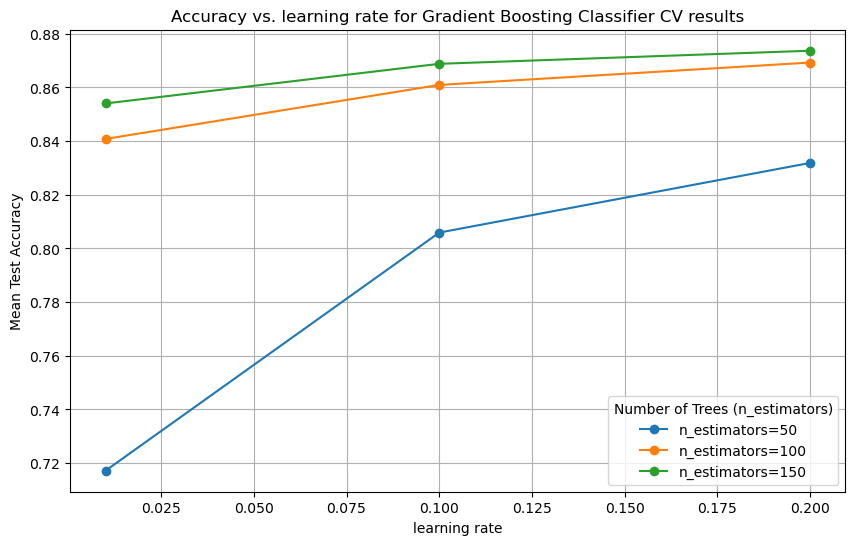

In \[377\]:

    # fit the model using optimal parameters
    gb_model_opt = GradientBoostingClassifier(learning_rate=0.2,n_estimators=150,max_features=100,min_samples_leaf = 20)

    # Fit the model
    gb_model_opt.fit(X_train_pca, y_train)

Out\[377\]:

    GradientBoostingClassifier(learning_rate=0.2, max_features=100,
                               min_samples_leaf=20, n_estimators=150)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GradientBoostingClassifier

    GradientBoostingClassifier(learning_rate=0.2, max_features=100,
                               min_samples_leaf=20, n_estimators=150)

In \[378\]:

    # training and testing error for the optimal boosting model, also runs a bit faster than random forest
    train_accuracy = gb_model_opt.score(X_train_pca, y_train)
    test_accuracy = gb_model_opt.score(X_test_pca , y_test)
    print(train_accuracy)
    print(test_accuracy)

    0.9822471106874776
    0.8599333015721772

In \[464\]:

    # classification report, high error for ambiguous group, better than random forest
    y_pred = gb_model_opt.predict(X_test_pca)
    print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

               0       0.83      0.94      0.88       934
               1       0.89      0.91      0.90      1007
               2       0.75      0.08      0.14       158

        accuracy                           0.86      2099
       macro avg       0.82      0.64      0.64      2099
    weighted avg       0.85      0.86      0.83      2099

In \[465\]:

    # confusion matrix, high error rate for the ambiguous group
    multilabel_confusion_matrix(y_test, y_pred)

Out\[465\]:

    array([[[ 987,  178],
            [  56,  878]],

           [[ 980,  112],
            [  92,  915]],

           [[1937,    4],
            [ 146,   12]]])

In \[ \]: